In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
feature = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target","junk"]

In [3]:
os.chdir("C:/Users/ArrunPersonal/Codes/Semester7/IDS/NSL-KDD")

In [5]:
df = pd.read_csv("KDDTrain+.csv", names = feature)
df.drop(["junk"],axis = 1,inplace = True)

In [6]:
df.isnull().values.any()

False

In [7]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [8]:
protocol_dict = dict(zip(set(df['protocol_type']),np.arange(len(set(df['protocol_type'])))))
service_dict = dict(zip(set(df['service']),np.arange(len(set(df['service'])))))
flag_dict = dict(zip(set(df['flag']),np.arange(len(set(df['flag'])))))

In [9]:
# changing attack labels to their respective attack class
def change_feature(df):
    df.target.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
    df.target.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
    df.target.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
    df.target.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
    
    df.protocol_type.replace(protocol_dict.keys(),protocol_dict.values(),inplace=True)
    df.service.replace(service_dict.keys(),service_dict.values(),inplace=True)
    df.flag.replace(flag_dict.keys(),flag_dict.values(),inplace=True)

In [10]:
change_feature(df)

In [11]:
target_dict = dict(zip(set(df['target']),np.arange(len(set(df['target'])))))

In [12]:
def change_target(df):
    df.target.replace(target_dict.keys(),target_dict.values(),inplace=True)

In [13]:
change_target(df)

In [14]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,2,67,6,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,3
1,0,0,61,6,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,3
2,0,2,41,10,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,2,21,6,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,3
4,0,2,21,6,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3


In [15]:
df_lis = np.array(df.values.tolist())

In [16]:
from scipy.stats import pearsonr

In [17]:
features = np.array(df_lis[:,:-1])
labels = np.array(df_lis[:,-1])

In [18]:
for i in range(np.shape(features)[1]):
    if(np.std(features[:,i])!=0):
        features[:,i] = (features[:,i]-np.mean(features[:,i]))/np.std(features[:,i]) 
    else:
        features[:,i] = (features[:,i]-np.mean(features[:,i]))
np.shape(features)

(125973, 41)

In [19]:
np.shape(features),np.shape(labels)

((125973, 41), (125973,))

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
train_X, test_X , train_Y ,test_Y = train_test_split(features,labels,random_state = 42,test_size = 0.1)

In [22]:
set(train_Y)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [24]:
print(np.shape(train_X),np.shape(test_X),np.shape(train_Y),np.shape(test_Y))

(113375, 41) (12598, 41) (113375,) (12598,)


# Stacked Attention Auto Encoder

### First Stack

In [25]:
from keras.layers import *
from keras.models import Model
from keras_self_attention import SeqSelfAttention

In [26]:
batch_size = 128
input_dim = np.shape(train_X)[1]
#Input Layer

input_layer = Input(shape=(input_dim,1), name='input')
#Attention Mechanism
embedding = Embedding(input_dim=input_dim, output_dim=256)(input_layer)
LSTM_layer = LSTM(units=128,return_sequences=True)(input_layer)
attention = SeqSelfAttention(attention_activation='sigmoid')(input_layer)
flatten = Flatten()(attention)
#Encoder’s first dense layer
encoder = Dense (128, activation='relu')(flatten)
#Encoder’s second dense layer
encoder = Dense (64, activation='relu')(encoder)
# Code layer
latent_layer = Dense (32, activation='relu',name = 'latent_1')(encoder)
# Decoder’s first dense layer
decoder = Dense(64, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(128, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(256, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

C:\Users\ArrunPersonal\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [27]:
autoencoder_1 = Model(inputs=input_layer, outputs=decoder)
autoencoder_1.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [28]:
autoencoder_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 41, 1)]           0         
                                                                 
 seq_self_attention (SeqSelf  (None, 41, 1)            129       
 Attention)                                                      
                                                                 
 flatten (Flatten)           (None, 41)                0         
                                                                 
 dense (Dense)               (None, 128)               5376      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 latent_1 (Dense)            (None, 32)                2080      
                                                             

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [31]:
stack_1 = autoencoder_1.fit(train_X, train_X, epochs=100, batch_size=batch_size,validation_data = (test_X,test_X),callbacks = [callback])

Epoch 1/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6403 - accuracy: 0.5328 - val_loss: 0.5164 - val_accuracy: 0.4774
Epoch 2/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6407 - accuracy: 0.5270 - val_loss: 0.5164 - val_accuracy: 0.5598
Epoch 3/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6406 - accuracy: 0.5295 - val_loss: 0.5169 - val_accuracy: 0.5696
Epoch 4/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6410 - accuracy: 0.5344 - val_loss: 0.5172 - val_accuracy: 0.5369
Epoch 5/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6413 - accuracy: 0.5313 - val_loss: 0.5181 - val_accuracy: 0.4530
Epoch 6/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6409 - accuracy: 0.5202 - val_loss: 0.5161 - val_accuracy: 0.5643
Epoch 7/100
886/886 [==============================] - 7s 8ms/step - loss: 0.6409 - accuracy: 0.5297 - val_loss: 0.5166 - val_accuracy: 0.5510

In [33]:
stack_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
pred = autoencoder_1.predict(features)

3937/3937 [==============================] - 12s 3ms/step


In [35]:
from sklearn.metrics import *
import keras

In [36]:
np.sum(keras.losses.mean_squared_error(pred,features))/len(features)

0.6041104356798558

In [37]:
layer_name = 'latent_1'
intermediate_layer_model = Model(inputs=autoencoder_1.input,
                                 outputs=autoencoder_1.get_layer(layer_name).output)
intermediate_output_1 = intermediate_layer_model.predict(features)

3937/3937 [==============================] - 10s 3ms/step


### Second Stack

In [38]:
batch_size = 128
input_dim = np.shape(intermediate_output_1)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
encoder = Dense (128, activation='relu')(input_layer)
#Encoder’s first dense layer
encoder = Dense (64, activation='relu')(encoder)
#Encoder’s second dense layer
encoder = Dense (32, activation='relu')(encoder)
# Code layer
latent_layer = Dense (16, activation='relu',name = 'latent_2')(encoder)
# Decoder’s first dense layer
decoder = Dense(32, activation='relu')(latent_layer)
# Decoder’s second dense layer
decoder = Dense(64, activation='relu')(decoder)
# Decoder’s Third dense layer
decoder = Dense(128, activation='relu')(decoder)
# Output Layer
decoder = Dense(input_dim, activation='relu')(decoder)

In [39]:
autoencoder_2 = Model(inputs=input_layer, outputs=decoder)
autoencoder_2.compile(metrics=['accuracy'],loss='mse',optimizer='adam')

In [40]:
autoencoder_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense_6 (Dense)             (None, 128)               4224      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 latent_2 (Dense)            (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112

In [41]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,restore_best_weights=True)

In [42]:
train_intX, test_intX , train_intY ,test_intY = train_test_split(intermediate_output_1,labels,random_state = 42,test_size = 0.1)

In [43]:
stack_2 = autoencoder_2.fit(train_intX, train_intX, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intX))

Epoch 1/100
3543/3543 [==============================] - 24s 6ms/step - loss: 0.0256 - accuracy: 0.7814 - val_loss: 0.0101 - val_accuracy: 0.8768
Epoch 2/100
3543/3543 [==============================] - 23s 6ms/step - loss: 0.0154 - accuracy: 0.8703 - val_loss: 0.0179 - val_accuracy: 0.9043
Epoch 3/100
3543/3543 [==============================] - 23s 6ms/step - loss: 0.0158 - accuracy: 0.8782 - val_loss: 0.0124 - val_accuracy: 0.8942
Epoch 4/100
3543/3543 [==============================] - 23s 6ms/step - loss: 0.0171 - accuracy: 0.8618 - val_loss: 0.0140 - val_accuracy: 0.8562
Epoch 5/100
3543/3543 [==============================] - 23s 7ms/step - loss: 0.0143 - accuracy: 0.8741 - val_loss: 0.0077 - val_accuracy: 0.9094
Epoch 6/100
3543/3543 [==============================] - 23s 6ms/step - loss: 0.0146 - accuracy: 0.8820 - val_loss: 0.0142 - val_accuracy: 0.8488
Epoch 7/100
3543/3543 [==============================] - 22s 6ms/step - loss: 0.0152 - accuracy: 0.8770 - val_loss: 0.0197 -

In [44]:
pred = autoencoder_2.predict(intermediate_output_1)

3937/3937 [==============================] - 9s 2ms/step


In [45]:
np.sum(keras.losses.mean_squared_error(pred,intermediate_output_1))/len(intermediate_output_1)

0.005782001687923702

In [46]:
layer_name = 'latent_2'
intermediate_layer_model = Model(inputs=autoencoder_2.input,
                                 outputs=autoencoder_2.get_layer(layer_name).output)
intermediate_output_2 = intermediate_layer_model.predict(intermediate_output_1)

3937/3937 [==============================] - 7s 2ms/step


### Classifier Model

In [47]:
batch_size = 32
input_dim = np.shape(intermediate_output_2)[1]
input_layer = Input(shape=(input_dim), name='input')
#Input Layer
dense1 = Dense (128, activation='relu')(input_layer)
dense2 = Dense (64, activation='relu')(dense1)
dense3 = Dense (8, activation='relu')(dense2)
# Output Layer
classifier = Dense(len(set(train_Y)), activation='softmax')(dense3)

In [49]:
classify = Model(inputs=input_layer, outputs=classifier)
classify.compile(metrics=['accuracy'],loss='sparse_categorical_crossentropy',optimizer='adam')

In [50]:
train_intX, test_intX , train_intY ,test_intY = train_test_split(intermediate_output_2,labels,random_state = 42,test_size = 0.1)

In [51]:
history = classify.fit(train_intX, train_intY, epochs=100, batch_size=32,callbacks = [callback],validation_data = (test_intX, test_intY))

Epoch 1/100
3543/3543 [==============================] - 20s 5ms/step - loss: 0.1495 - accuracy: 0.9553 - val_loss: 0.0744 - val_accuracy: 0.9767
Epoch 2/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0593 - val_accuracy: 0.9826
Epoch 3/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0515 - accuracy: 0.9832 - val_loss: 0.0641 - val_accuracy: 0.9770
Epoch 4/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0465 - accuracy: 0.9852 - val_loss: 0.0538 - val_accuracy: 0.9834
Epoch 5/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0432 - accuracy: 0.9854 - val_loss: 0.0474 - val_accuracy: 0.9861
Epoch 6/100
3543/3543 [==============================] - 19s 5ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0610 - val_accuracy: 0.9812
Epoch 7/100
3543/3543 [==============================] - 9s 3ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.0472 - 

In [52]:
preds = classify.predict(test_intX)

394/394 [==============================] - 0s 1ms/step


In [53]:
np.shape(preds),np.shape(test_intY)

((12598, 5), (12598,))

In [54]:
set(labels)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(np.argmax(preds,axis = 1), test_intY)

In [56]:
print(accuracy_score(np.argmax(preds,axis = 1),test_intY))
print(precision_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(recall_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))
print(f1_score(np.argmax(preds,axis = 1),test_intY,average = 'macro'))

0.9917447213843468
0.7454787987469624
0.7861249074744339
0.7636205437423936


In [57]:
import seaborn as sns

<AxesSubplot:>

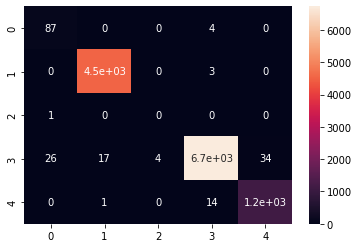

In [58]:
sns.heatmap(conf_mat, annot=True)